In [1]:
#CONDA ENV base (python 3.9.7)
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#Import your modules
#---------------------------------------
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.7.4 (default, Aug 13 2019, 20:35:49) \n[GCC 7.3.0]'

In [8]:
#Load in txt with tab separation file with pandas 
df = pd.read_csv('//datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/rna_seq/allSamples_rsem_genes_results_mod.txt', sep='\t', header=0, index_col=0)

In [48]:
#load in metadata
meta = pd.read_csv('//cndd3/dburrows/DATA/te/metadata/PE/PEC_RNAmeta.csv')
INF = meta[meta['period'] == 'adolescence'] # <1 infancy
ECH = meta[meta['period'] == 'earlychildhood'] # 1-5 early childhood
LCH = meta[meta['period'] == 'latechildhood'] #5-12 late childhood
ADO = meta[meta['period'] == 'adolescence'] #12-20 adolescence
ADU = meta[meta['period'] == 'adulthood'] #20-50 adulthood
LADU = meta[meta['period'] == 'lateadulthood'] #50-80 late adulthood
#make age groups
#meta['age_group'] = meta['AGEYEARS'].apply(lambda x: 'infancy' if x < INF else ('early childhood' if x < ECH else ('late childhood' if x < LCH else ('adolescence' if x < ADO else ('adulthood' if x < ADU else ('late adulthood'))))))

In [162]:
def group_plot(curr, a, b):
    fig, axarr = plt.subplots(figsize = (7,5))

    names = curr['sample'].values
    for n in names:
        #make logarithmic bins
        data = df[n][df[n].values >0].values
        cpm_data=(data/np.sum(data))*1e6
        filt_data = cpm_data[cpm_data > 10]
        hist = np.histogram(filt_data, bins = b)
        xaxis = hist[1][:-1]
        axarr.plot(xaxis[:len(xaxis)-1], hist[0][:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1)
        #plt.hist(data, alpha=a, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)), b))

    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [ ]:
data = df[n][df[n].values !=0].values
cpm_data=(data/np.sum(data))*1e6

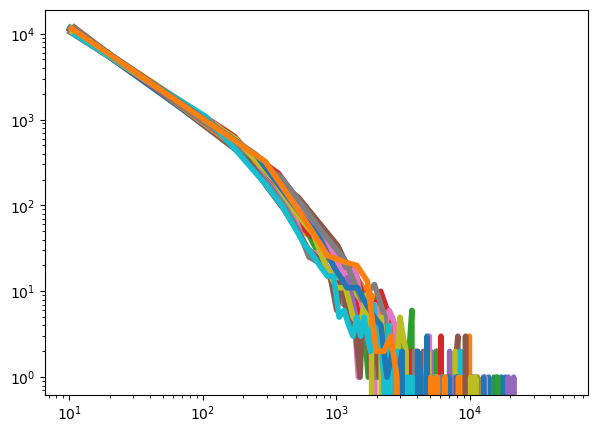

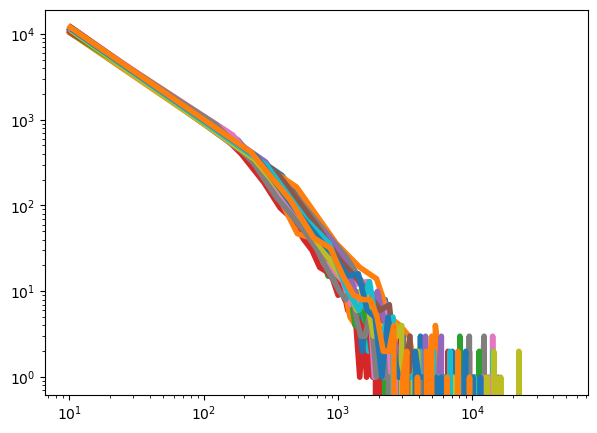

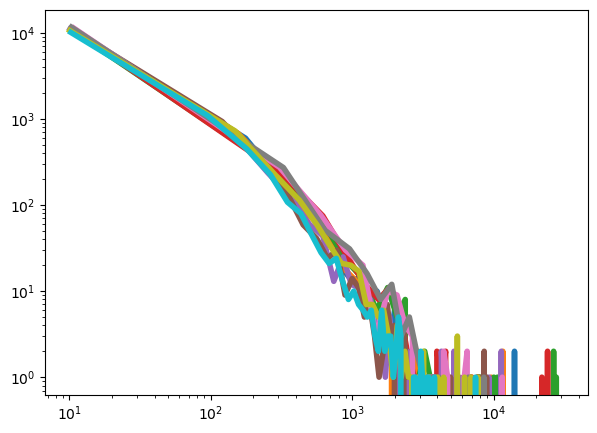

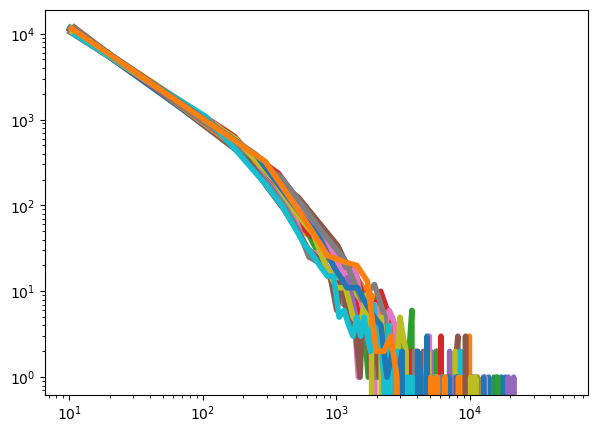

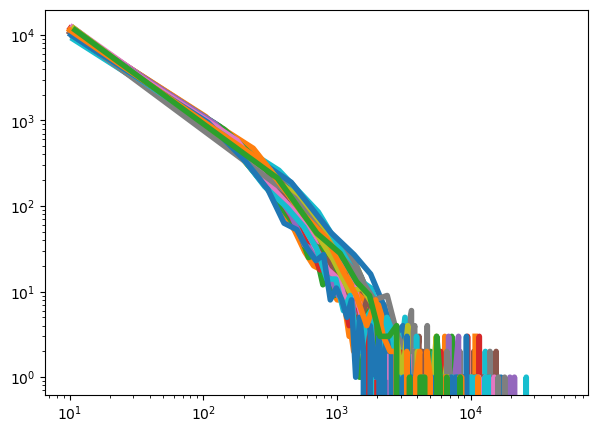

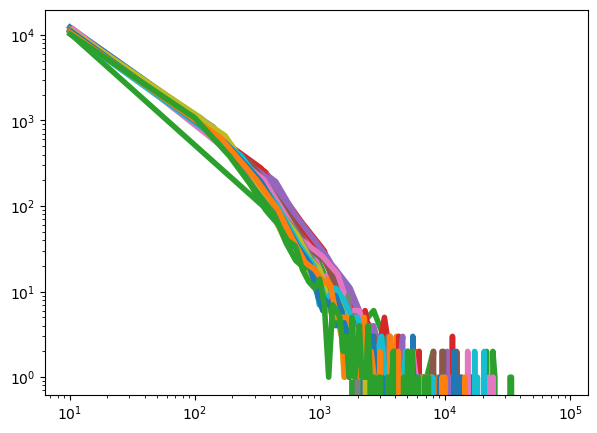

In [163]:
group_plot(INF, 0.1, 100)
group_plot(ECH, 0.1, 100)
group_plot(LCH, 0.1, 100)
group_plot(ADO, 0.1, 100)
group_plot(ADU, 0.1, 100)
group_plot(LADU, 0.1, 100)

In [117]:
cc.__getitem__

<bound method Cycler.__getitem__ of cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])>

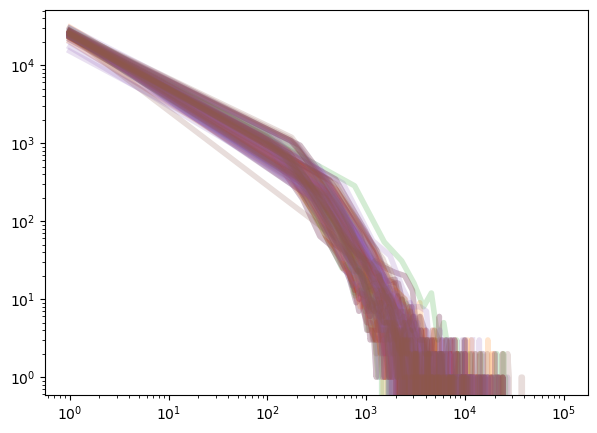

In [121]:

fig, axarr = plt.subplots(figsize = (7,5))
group_l = [INF, ECH, LCH, ADO, ADU, LADU]
#import cycler
from cycler import cycler
#make color cycler with 6 colors
cc =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for x,curr in enumerate(group_l):
    names = curr['sample'].values
    for n in names:
        #make logarithmic bins
        data = df[n][df[n].values !=0].values
        hist = np.histogram(data, bins = 100)
        xaxis = hist[1][:-1]
        axarr.plot(xaxis[:len(xaxis)-1], hist[0][:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 0.2, c=cc[x])
        #plt.hist(data, alpha=a, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)), b))

plt.xscale('log')
plt.yscale('log')
plt.show()